In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Gene One,0
Gene Two,0
Cancer Present,0


In [ ]:
df.shape

(3000, 3)

In [ ]:
X = df.drop(['Cancer Present'], axis=1)
y = df['Cancer Present']

In [ ]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],), name='Input_Layer'),
    keras.layers.Dense(32, activation='relu', name='HL_1'),
    keras.layers.Dense(32, activation='relu', name='HL_2'),
    keras.layers.Dense(1, activation='sigmoid', name='Output_Layer')
])

In [ ]:
from keras import Sequential
from keras.optimizers import Adam

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7599 - loss: 0.6243 - val_accuracy: 0.8567 - val_loss: 0.4830
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8543 - loss: 0.4390 - val_accuracy: 0.8633 - val_loss: 0.3602
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8591 - loss: 0.3425 - val_accuracy: 0.8600 - val_loss: 0.3129
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8675 - loss: 0.3071 - val_accuracy: 0.8633 - val_loss: 0.2981
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8744 - loss: 0.2915 - val_accuracy: 0.8700 - val_loss: 0.2874
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8759 - loss: 0.2781 - val_accuracy: 0.8700 - val_loss: 0.2759
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8758 - loss: 0.2758 - val_accuracy: 0.8800 - val_loss: 0.2649
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8806 - loss: 0.2731 - val_accuracy: 0.8900 - val_loss

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HL_1 (Dense)                    │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL_2 (Dense)                    │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,557 (13.90 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,372 (9.27 KB)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9248 - loss: 0.1487 
Test Loss: 0.1614
Test Accuracy: 92.67%


In [ ]:
y_proba = model.predict(X_test)
y_pred = (y_proba >= 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
print(f'Actual Values {X_test[:5]}')
print(f'Predicted Values {y_pred[:5]}')

Actual Values [[-0.76551185 -0.61401154]
 [-0.43812714 -0.15166071]
 [ 0.43489876 -0.38283612]
 [-0.05617831  0.77304096]
 [-0.00161419  0.48407169]]
Predicted Values [[1]
 [1]
 [0]
 [0]
 [0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       158
           1       0.93      0.91      0.92       142

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



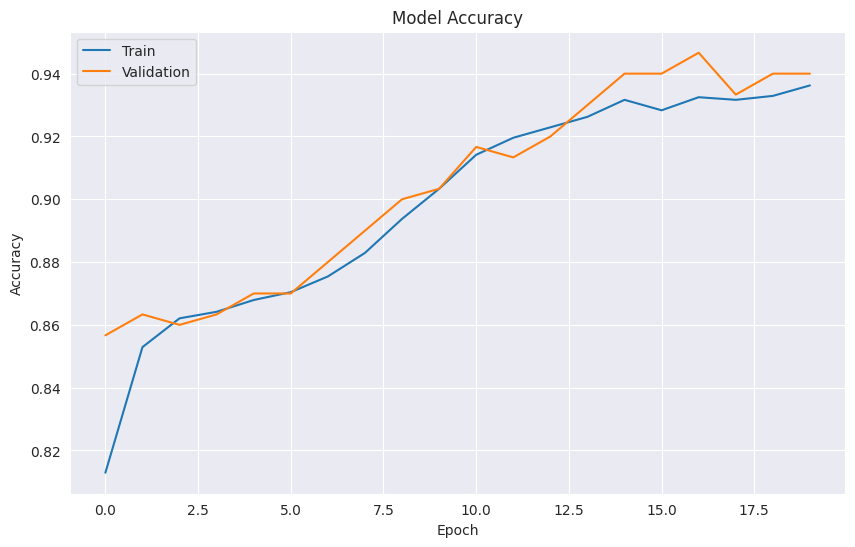

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()